In [1]:
import keras
import numpy as np
import pandas as pd
import tools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
file_app_test = './data/application_test.csv'
app_test_data = pd.read_csv(file_app_test)

In [3]:
app_test_data.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [4]:
select_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE']

In [5]:
data = app_test_data[select_cols].copy(deep=True)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(data.head(10))

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   
5      100042         Cash loans           F            Y               Y   
6      100057         Cash loans           M            Y               Y   
7      100065         Cash loans           M            N               Y   
8      100066         Cash loans           F            N               Y   
9      100067         Cash loans           F            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000

In [6]:
tools.correctApplicationData(data)

In [7]:
import pickle
with open('train_manipulation.pickle','rb') as f:
    train_mani = pickle.load(f)

labelDict = train_mani['labelDict']
scaleFactors = train_mani['scaleFactors']

In [8]:
scaleFactors

{'SK_ID_CURR': (278180.51857657125, 102790.00821577091),
 'TARGET': (0.08072881945686496, 0.2724182027067315),
 'AMT_INCOME_TOTAL': (168797.9192969845, 237122.7607262434),
 'AMT_CREDIT': (599025.9997057016, 402490.1225621855),
 'AMT_ANNUITY': (27108.573909183444, 14493.430951156583),
 'AMT_GOODS_PRICE': (538396.2074288892, 369278.82596304925),
 'DAYS_BIRTH': (-16036.995066843137, 4363.981536117146),
 'DAYS_EMPLOYED': (-2384.169324613206, 2117.3785298414386)}

In [9]:
import importlib
importlib.reload(tools)

tools.convertObjToLabel(data, labelDict)
cvdata = tools.genNPTestData(data, labelDict, scaleFactors)
X_test = cvdata[:, 1:-1]

In NAME_CONTRACT_TYPE, replace Cash loans with 0
In NAME_CONTRACT_TYPE, replace Revolving loans with 1
In CODE_GENDER, replace M with 0
In CODE_GENDER, replace F with 1
In FLAG_OWN_CAR, replace N with 0
In FLAG_OWN_CAR, replace Y with 1
In FLAG_OWN_REALTY, replace Y with 0
In FLAG_OWN_REALTY, replace N with 1
In NAME_INCOME_TYPE, replace Working with 0
In NAME_INCOME_TYPE, replace State servant with 1
In NAME_INCOME_TYPE, replace Commercial associate with 2
In NAME_INCOME_TYPE, replace Pensioner with 3
In NAME_INCOME_TYPE, replace Unemployed with 4
In NAME_INCOME_TYPE, replace Student with 5
In NAME_INCOME_TYPE, replace Businessman with 6
In NAME_INCOME_TYPE, replace Maternity leave with 7
In NAME_EDUCATION_TYPE, replace Secondary / secondary special with 0
In NAME_EDUCATION_TYPE, replace Higher education with 1
In NAME_EDUCATION_TYPE, replace Incomplete higher with 2
In NAME_EDUCATION_TYPE, replace Lower secondary with 3
In NAME_EDUCATION_TYPE, replace Academic degree with 4
In NAME_F

# Load model

In [10]:
def buildModel(inputshape):
    xin = keras.layers.Input(inputshape)
    x = keras.layers.Dense(64*2, activation='relu',
        kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05))(xin)
    x = keras.layers.Dense(64, activation='relu',
        kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05))(xin)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(32, activation='relu',
        kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05))(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(16, activation='relu',
        kernel_initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05))(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(1, activation='sigmoid')(x)
    model = keras.models.Model(inputs=xin, outputs=x)
    return model

In [11]:
model = buildModel((X_test.shape[1],))
model.load_weights('small_train.h5')

In [12]:
# define a metric
import keras.backend as K
import tensorflow as tf
import importlib

importlib.reload(tools)

recall = tools.as_keras_metric(tf.metrics.recall)
precision = tools.as_keras_metric(tf.metrics.precision)

# def f1_score(y_true, y_pred):
#     precision,_ = K.tf.metrics.precision(y_true, y_pred)
#     recall,_ = K.tf.metrics.recall(y_true, y_pred)
#     f1 = 2*(precision*recall)/(precision+recall)
#     return f1

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

In [13]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy', f1_score, precision, recall])

# Predict

In [14]:
Y_pred = model.predict(X_test)

(array([  456.,  1023.,  2133.,  3427.,  4812.,  6115.,  6424.,  6134.,
         6257., 11963.]),
 array([4.87415122e-08, 1.18668160e-02, 2.37335833e-02, 3.56003506e-02,
        4.74671179e-02, 5.93338852e-02, 7.12006525e-02, 8.30674198e-02,
        9.49341871e-02, 1.06800954e-01, 1.18667722e-01]),
 <a list of 10 Patch objects>)

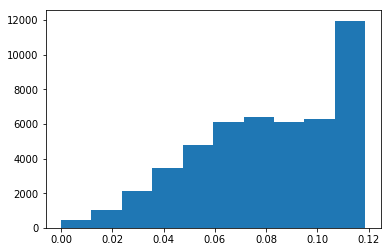

In [15]:
plt.hist(Y_pred)

# Save to a submission file

In [16]:
result = np.vstack((data['SK_ID_CURR'].values, Y_pred.reshape((Y_pred.size,))))

result = pd.DataFrame(result.transpose(), columns=['SK_ID_CURR', 'TARGET'])

In [17]:
result['SK_ID_CURR'] = result['SK_ID_CURR'].astype('int32', copy=False)

In [18]:
result.head()

SK_ID_CURR    TARGET
0      100001  0.073266
1      100005  0.118227
2      100013  0.050454
3      100028  0.071784
4      100038  0.107114

In [19]:
result.to_csv('submission.csv',index=False)